## Sleep Health and Lifestyle data Analysis

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Set style for visualizations
sns.set(style="whitegrid")

In [3]:
# Load dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Display basic info
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (374, 13)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
# Check missing values and data types
print("\nData types and missing values:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage:

## Explotory Data Analysis

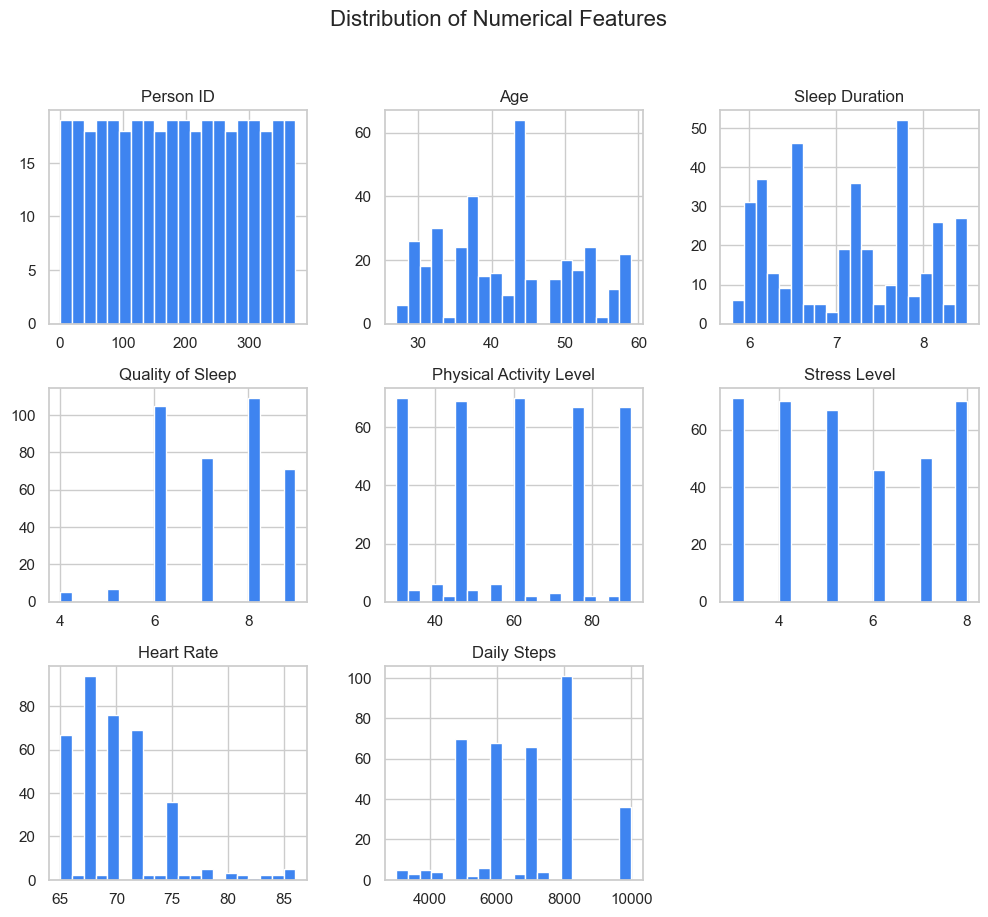

In [5]:
# Distribution of numerical features
df.hist(figsize=(12, 10), bins=20, color='#3E84F0')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


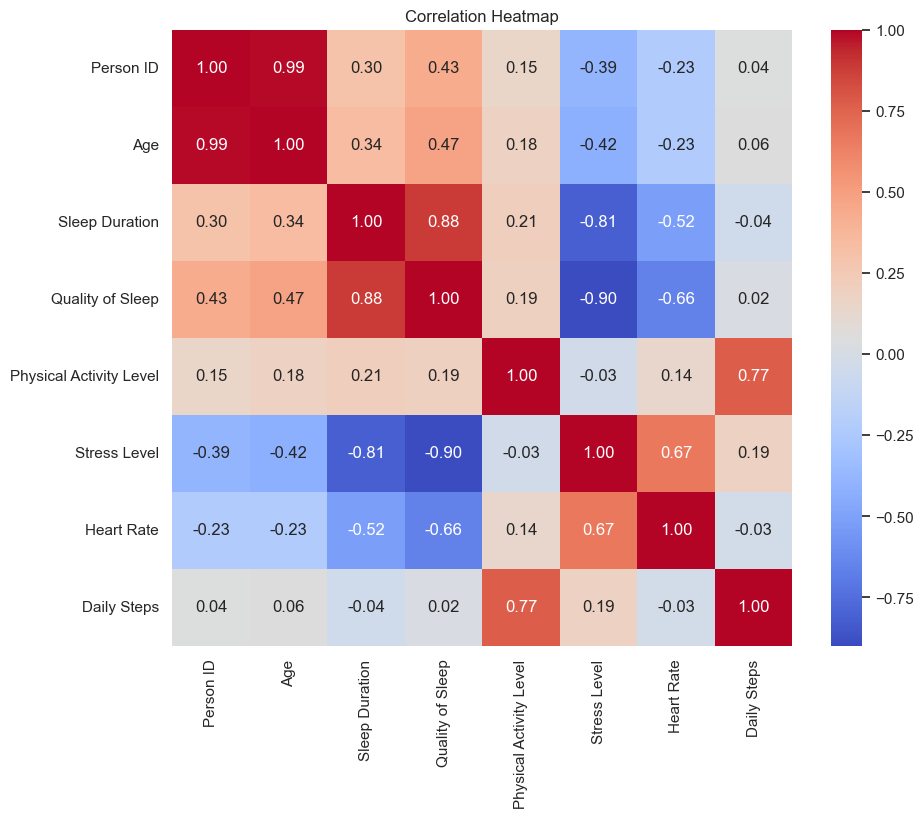

In [6]:
# Correlation heatmap (numerical features only)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


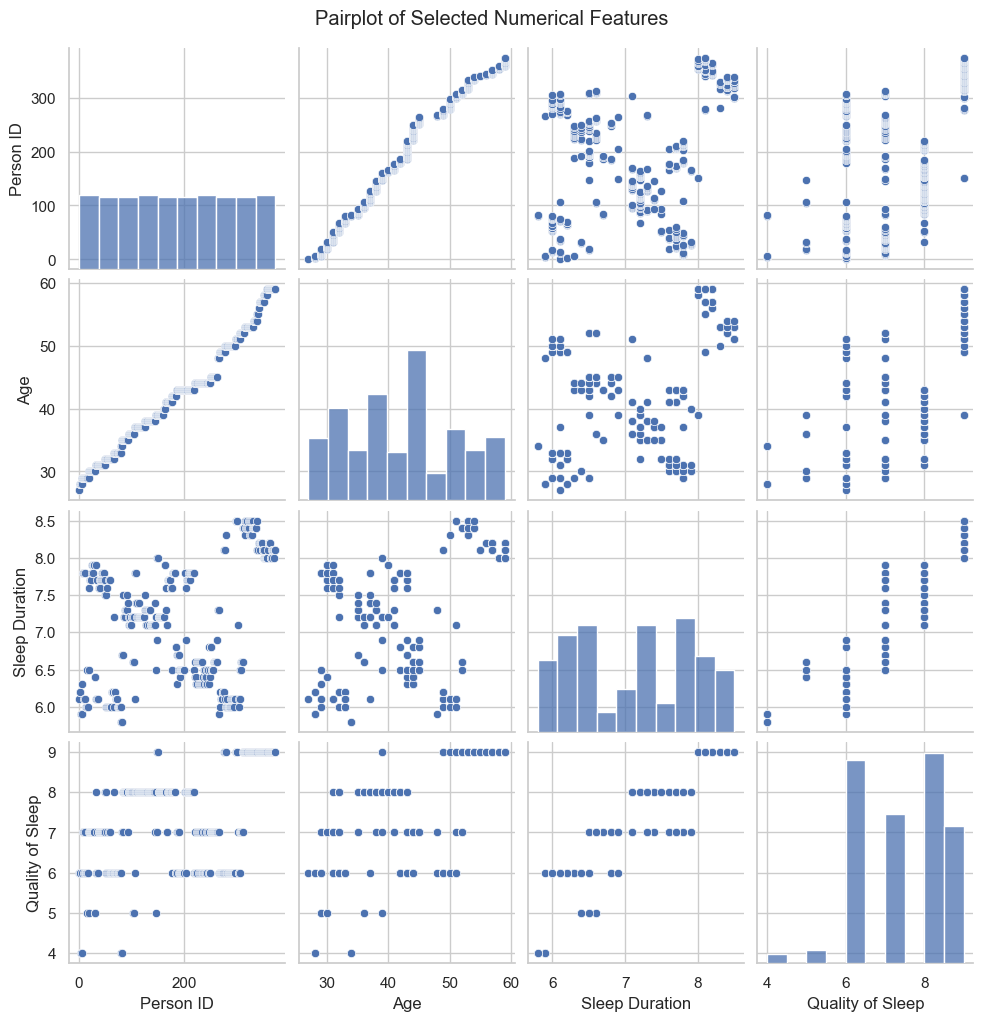

In [7]:
# Pairplot for selected features
selected_cols = df.select_dtypes(include=['int64', 'float64']).columns[:4]
sns.pairplot(df[selected_cols])
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()

C:\Users\LOQ\AppData\Local\Temp\ipykernel_24944\2635843914.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


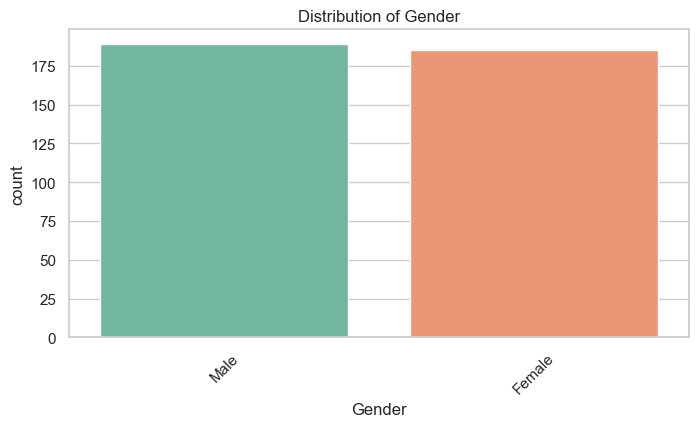

C:\Users\LOQ\AppData\Local\Temp\ipykernel_24944\2635843914.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


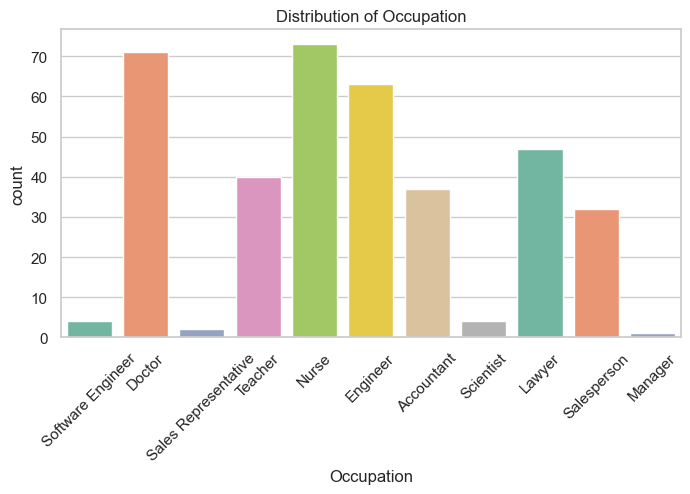

C:\Users\LOQ\AppData\Local\Temp\ipykernel_24944\2635843914.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


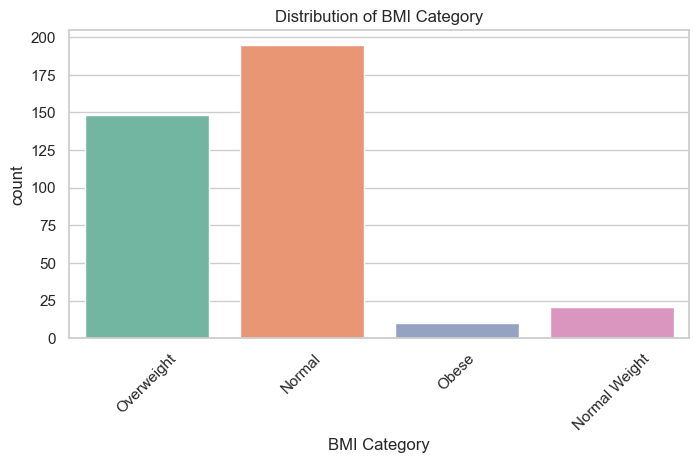

In [8]:
# Categorical feature visualization example
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols[:3]:  # visualize first 3 categorical columns
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


## Data Preprocessing: One-Hot Encoding & Standardization

In [9]:
# Separate features and target (you can modify 'Quality of Sleep' to your target variable)
target_col = 'Quality of Sleep'
X = df.drop(target_col, axis=1)
y = df[target_col]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

print("Categorical columns:", categorical_cols.tolist())
print("Numerical columns:", numerical_cols.tolist())

# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])

# Fit and transform
X_processed = preprocessor.fit_transform(X)

# Create processed DataFrame
processed_col_names = (
    preprocessor.named_transformers_['cat']
    .get_feature_names_out(categorical_cols)
    .tolist() + numerical_cols.tolist()
    )
X_processed_df = pd.DataFrame(X_processed, columns=processed_col_names)

print("\nProcessed data preview:")
X_processed_df.head()

Categorical columns: ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']
Numerical columns: ['Person ID', 'Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

Processed data preview:


,Gender_Male,Occupation_Doctor,Occupation_Engineer,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,...,Blood Pressure_142/92,Sleep Disorder_Sleep Apnea,Sleep Disorder_nan,Person ID,Age,Sleep Duration,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-1.727426,-1.753096,-1.298887,-0.825418,0.347021,1.654719,-1.619584
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.718163,-1.637643,-1.173036,0.039844,1.475592,1.170474,1.970077
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-1.708901,-1.637643,-1.173036,0.039844,1.475592,1.170474,1.970077
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.699639,-1.637643,-1.550588,-1.402260,1.475592,3.591698,-2.362273
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.690376,-1.637643,-1.550588,-1.402260,1.475592,3.591698,-2.362273


## Train-Test Split

In [10]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (299, 47)
Test set size: (75, 47)
